# Validation Curve

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load data
dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    stratify=y,
    test_size=0.30,
    random_state=1)

# Constructing a pipeline object (Without PCA)
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1, penalty='l2', max_iter=1000))])

# Constructing a pipeline object (With PCA)
# pipe_lr = Pipeline([('scl', StandardScaler()),
#                    ('pca', PCA(n_components=2)),
#                    ('clf', LogisticRegression(random_state=1, penalty='l2', max_iter=1000))])

In [15]:
# Get parameter names
for k, v in pipe_lr.get_params().items():
    print(f"{k:25.25s}: {str(v)}")

memory                   : None
steps                    : [('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(max_iter=1000, random_state=1))]
verbose                  : False
scl                      : StandardScaler()
pca                      : PCA(n_components=2)
clf                      : LogisticRegression(max_iter=1000, random_state=1)
scl__copy                : True
scl__with_mean           : True
scl__with_std            : True
pca__copy                : True
pca__iterated_power      : auto
pca__n_components        : 2
pca__random_state        : None
pca__svd_solver          : auto
pca__tol                 : 0.0
pca__whiten              : False
clf__C                   : 1.0
clf__class_weight        : None
clf__dual                : False
clf__fit_intercept       : True
clf__intercept_scaling   : 1
clf__l1_ratio            : None
clf__max_iter            : 1000
clf__multi_class         : auto
clf__n_jobs              : None
clf__penalty        

In [16]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, val_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

In [17]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

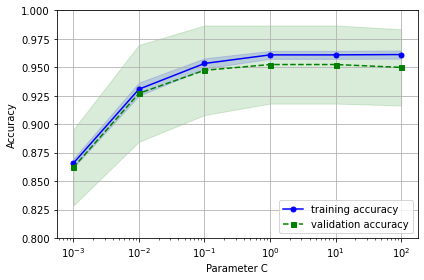

In [18]:
import matplotlib.pyplot as plt

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(param_range, val_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(param_range,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()